In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

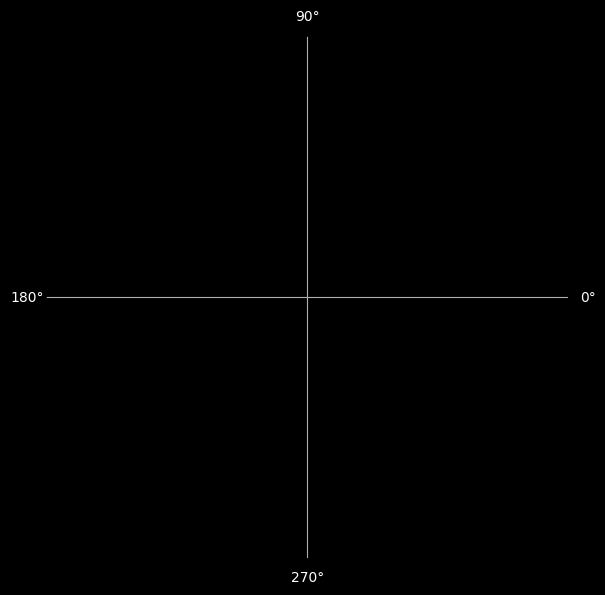

In [10]:
# Define the range for theta
theta = np.linspace(0, 2 * np.pi, 1000)

# Global variables for customization
separation_factor = 0.2  # Visual preference
total_frames = 1500  # Calculated for 29 seconds at 30 fps
animation_speed = 2  # Chosen for smooth coverage of theta

# Define the equations as functions
def r1(theta):
    return 1 + separation_factor + (np.abs(np.cos(3*theta)) + 2*(0.25 - np.abs(np.cos(3*theta + np.pi/2)))) / (2 + 8*np.abs(np.cos(6*theta + np.pi/2)))

def r2(theta):
    return 2 + separation_factor + (np.abs(np.cos(3*theta)) + 2*(0.25 - np.abs(np.cos(3*theta + np.pi/2)))) / (2 + 8*np.abs(np.cos(6*theta + np.pi/2)))

def r3(theta):
    return 3 + separation_factor + (np.abs(np.cos(6*theta)) + 2*(0.25 - np.abs(np.cos(6*theta + np.pi/2)))) / (2 + 8*np.abs(np.cos(12*theta + np.pi/2)))

# Compute maximum value of r1, r2, r3 to dynamically adjust ylim
max_r1 = np.max(r1(theta))
max_r2 = np.max(r2(theta))
max_r3 = np.max(r3(theta))
max_r = max(max_r1, max_r2, max_r3)

# Initialize the plot
#fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar', 'facecolor': 'black'})
fig, ax = plt.subplots(figsize=(6.75, 12), subplot_kw={'projection': 'polar', 'facecolor': 'black'}) # Figsize for a 9:16 aspect ratio or 6.75 x 12 inches

# Set the figure background to black
fig.patch.set_facecolor('black')

ax.set_facecolor('black')  # Set background to black


# Set dynamic ylim based on the maximum value
ax.set_ylim(0, max_r)

# Customize appearance
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_yticklabels([])
ax.set_xticks(np.pi/180. * np.array([0, 90, 180, 270]))
ax.set_xticklabels(['0°', '90°', '180°', '270°'], color='black')

def animate_sequential(i):
    ax.cla()
    ax.set_facecolor('black')
    ax.xaxis.grid(True)
    ax.yaxis.grid(False)
    ax.set_yticklabels([],color='black')
    ax.set_xticks(np.pi/180. * np.array([0, 90, 180, 270]))
    ax.set_xticklabels(['0°', '90°', '180°', '270°'], color='white')
    ax.set_ylim(0, max_r)

    frames_per_section = total_frames // 3
    current_section = i // frames_per_section
    frame_in_section = i % frames_per_section
    theta_index = int((frame_in_section / frames_per_section) * len(theta))

    # Plot previous sections
    if current_section > 0:
        ax.plot(theta, r1(theta), label='Equation 1', color='blue', linewidth=2)
    if current_section > 1:
        ax.plot(theta, r2(theta), label='Equation 2', color='red', linewidth=2)

    # Calculate and plot the current section
    if current_section == 0:
        current_r = r1(theta[:theta_index])
        current_theta = theta[:theta_index]
    elif current_section == 1:
        current_r = r2(theta[:theta_index])
        current_theta = theta[:theta_index]
    else:
        current_r = r3(theta[:theta_index])
        current_theta = theta[:theta_index]

    # Plot the curve for the current section
    ax.plot(current_theta, current_r, color='blue' if current_section == 0 else ('red' if current_section == 1 else 'green'), linewidth=2)

    # Extend the line infinitely in both directions for the current point
    if theta_index > 0:
        # Calculate direction vector in Cartesian coordinates
        direction_x = np.cos(current_theta[-1])
        direction_y = np.sin(current_theta[-1])

        # Calculate two distant points along the line
        distant_point1_x, distant_point1_y = -max_r * direction_x, -max_r * direction_y
        distant_point2_x, distant_point2_y = max_r * direction_x, max_r * direction_y

        # Plot the line
        ax.plot([distant_point1_x, distant_point2_x], [distant_point1_y, distant_point2_y], color='cyan', linewidth=2, transform=ax.transData._b, linestyle='--')

        # Highlight the current point on the curve with a marker
        ax.plot(current_theta[-1], current_r[-1], marker='o', color='yellow', markersize=10)


    #ax.legend(loc='upper right', facecolor='white', edgecolor='white')
    #ax.set_title("Dynamic Lotus Pattern Formation", color='white')

# Create and display the animation
anim_sequential = FuncAnimation(fig, animate_sequential, frames=total_frames, interval=20, blit=False)
HTML(anim_sequential.to_html5_video())